In [1]:
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import the libraries to handle the np array, pandas dataframe, and visualiztion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import prepare.py to prepare the dataset
import prepare, explore

import psutil
from tqdm import tqdm

### Acquire the data

In [2]:
# Acquire the train, validate and test from csv files with 2000 user

df_train = pd.read_csv('data_2000users/train.csv')
df_validate = pd.read_csv('data_2000users/validate.csv')
df_test = pd.read_csv('data_2000users/test.csv')
df_ques = pd.read_csv('questions_with_tag_counts.csv', index_col=0)
# df_lects = pd.read_csv('lectures_with_part_name.csv', index_col=0)

# Print the shape of the datasets
df_train.shape, df_validate.shape, df_test.shape, df_ques.shape

((411517, 18), (50842, 18), (52868, 18), (13523, 6))

In [3]:
%%time
# Compute the time to process the cell

# Test the fucntion to complete all the steps above
train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(df_train, df_validate, df_test)

# Print the shapes of train, validate, and test
train.shape, validate.shape, test.shape

CPU times: user 11.2 s, sys: 961 ms, total: 12.2 s
Wall time: 12.3 s


((403377, 22), (49945, 21), (51971, 21))

In [4]:
# Inpsect the train
train.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_container_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
0,0,1864702,5720,0,1,False,0.630049,0,45951.0,11917302.0,...,5,115,1,0.82,0.61,1.00,0.82,0.68,0.62,0.79
1,45951,1864702,5204,1,0,False,0.630049,0,28391.0,11917302.0,...,5,173,1,0.55,0.61,0.00,0.55,0.53,0.62,0.65
2,74342,1864702,4094,2,1,False,0.630049,0,22436.0,11917302.0,...,5,1,1,0.44,0.61,0.33,0.44,0.45,0.62,0.60
3,96778,1864702,9699,3,1,False,0.630049,0,36191.0,11917302.0,...,5,55,1,0.41,0.61,0.40,0.41,0.54,0.62,0.62
4,132969,1864702,5889,4,0,False,0.630049,0,24322.0,11917302.0,...,5,89,1,0.69,0.61,0.50,0.69,0.49,0.62,0.62


In [5]:
# Quick summary of train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403377 entries, 0 to 403376
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   timestamp                     403377 non-null  int64  
 1   user_id                       403377 non-null  int64  
 2   content_id                    403377 non-null  int64  
 3   task_container_id             403377 non-null  int64  
 4   answered_correctly            403377 non-null  int64  
 5   question_had_explanation      403376 non-null  object 
 6   user_acc_mean                 403377 non-null  float64
 7   user_lectures_running_total   403377 non-null  int64  
 8   q_time                        403377 non-null  float64
 9   avg_user_q_time               403377 non-null  float64
 10  question_id                   403377 non-null  int64  
 11  bundle_id                     403377 non-null  int64  
 12  part                          403377 non-nul

In [11]:
# Create the correct group and wrong group
correct = (train.answered_correctly == 1)
wrong = (train.answered_correctly == 0)

correct = train[correct]
wrong = train[wrong]

correct.shape, wrong.shape

((262571, 22), (140806, 22))

In [54]:
correct.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_container_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
0,0,1864702,5720,0,1,False,0.630049,0,45951.0,11917302.0,...,5,115,1,0.82,0.61,1.00,0.82,0.68,0.62,0.79
2,74342,1864702,4094,2,1,False,0.630049,0,22436.0,11917302.0,...,5,1,1,0.44,0.61,0.33,0.44,0.45,0.62,0.60
3,96778,1864702,9699,3,1,False,0.630049,0,36191.0,11917302.0,...,5,55,1,0.41,0.61,0.40,0.41,0.54,0.62,0.62
7,70707333,1864702,5577,19,1,True,0.630049,1,203236.0,11917302.0,...,5,91,1,0.77,0.61,1.00,0.77,0.63,0.62,0.63
8,70910569,1864702,4766,20,1,True,0.630049,1,178310.0,11917302.0,...,5,127,1,0.56,0.61,1.00,0.56,0.63,0.62,0.65


### content_id and mean_content_accuracy

In [35]:
train.content_id.nunique()

12520

In [64]:
train.groupby('content_id').mean_content_accuracy.mean()

content_id
0        0.89
1        0.86
2        0.56
3        0.73
4        0.61
         ... 
13517    0.00
13518    0.25
13519    0.00
13520    0.50
13522    1.00
Name: mean_content_accuracy, Length: 12520, dtype: float64

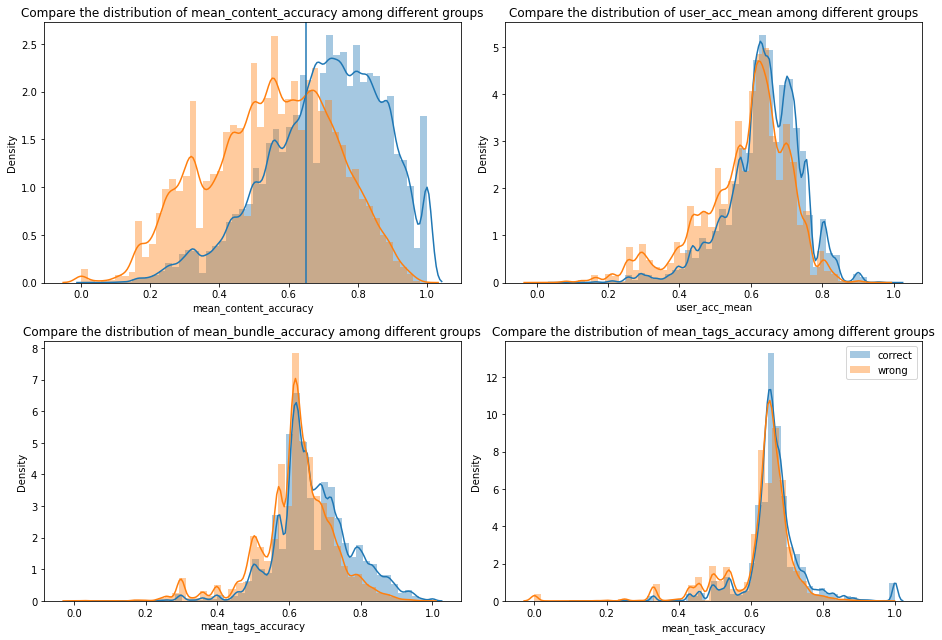

In [57]:
# mean_content_accuracy in different group

plt.figure(figsize=(13,9))

plt.subplot(221)
sns.distplot(correct.mean_content_accuracy, label='correct')
sns.distplot(wrong.mean_content_accuracy, label='wrong')
plt.title("Compare the distribution of mean_content_accuracy among different groups")
plt.axvline(x=0.65)

plt.subplot(222)
sns.distplot(correct.user_acc_mean, label='correct')
sns.distplot(wrong.user_acc_mean, label='wrong')
plt.title("Compare the distribution of user_acc_mean among different groups")

plt.subplot(223)
sns.distplot(correct.mean_tags_accuracy, label='correct')
sns.distplot(wrong.mean_tags_accuracy, label='wrong')
plt.title("Compare the distribution of mean_bundle_accuracy among different groups")

plt.subplot(224)
sns.distplot(correct.mean_task_accuracy, label='correct')
sns.distplot(wrong.mean_task_accuracy, label='wrong')
plt.title("Compare the distribution of mean_tags_accuracy among different groups")

plt.tight_layout()
plt.legend()
plt.show()

In [60]:
mask_above = correct.mean_content_accuracy >= 0.65
correct_above = correct[mask_above]
mask_below = correct.mean_content_accuracy < 0.65
correct_below = correct[mask_below]

correct_above.shape, correct_below.shape

((177492, 22), (85079, 22))

In [61]:
mask_above = wrong.mean_content_accuracy >= 0.65
wrong_above = wrong[mask_above]
mask_below = wrong.mean_content_accuracy < 0.65
wrong_below = wrong[mask_below]

wrong_above.shape, wrong_below.shape

((47356, 22), (93450, 22))

### Is this related to the content they have been tested on? 

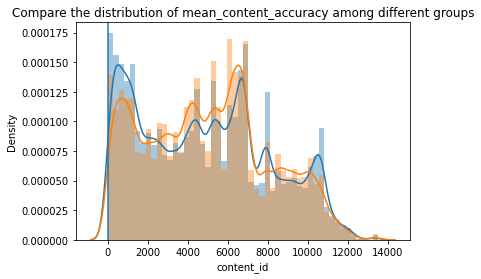

In [111]:
sns.distplot(correct.content_id, label='correct')
sns.distplot(wrong.content_id, label='wrong')
plt.title("Compare the distribution of mean_content_accuracy among different groups")
plt.axvline(x=0.65)
plt.show()

### Is it related to question_had_explanation? 

In [76]:
correct.question_had_explanation.value_counts(normalize=True)

True     0.915257
False    0.084743
Name: question_had_explanation, dtype: float64

In [75]:
wrong.question_had_explanation.value_counts(normalize=True)

True     0.851342
False    0.148658
Name: question_had_explanation, dtype: float64

### Is it related to q_time? 

In [80]:
correct.q_time.mean()

19112371.203982923

In [81]:
wrong.q_time.mean()

28528508.565238696

### Is it related to part?

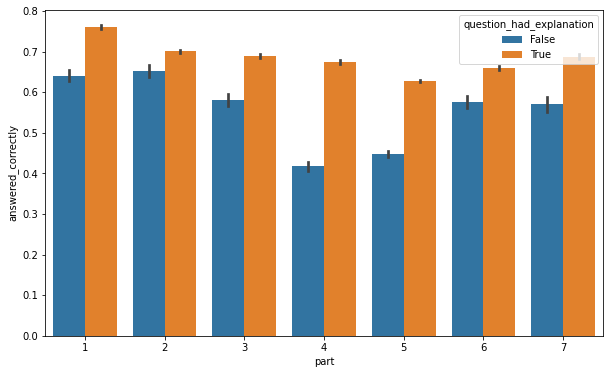

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='part', y='answered_correctly', hue='question_had_explanation')
plt.show()

In [112]:
df_ques.head()

,question_id,bundle_id,correct_answer,part,tags,tag_count
0,0,0,0,1,51 131 162 38,4
1,1,1,1,1,131 36 81,3
2,2,2,0,1,131 101 162 92,4
3,3,3,0,1,131 149 162 29,4
4,4,4,3,1,131 5 162 38,4


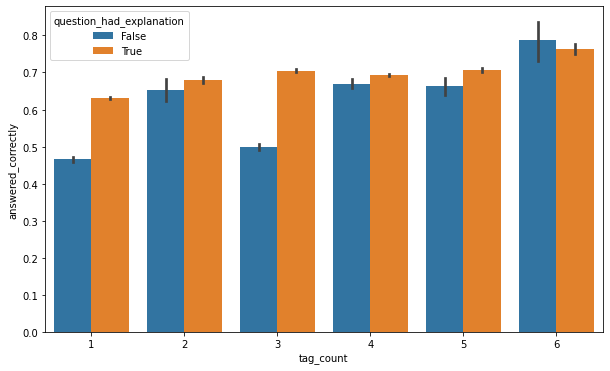

In [109]:
# How 

plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='tag_count', y='answered_correctly', hue='question_had_explanation')
plt.show()

### subtract the users that use the apps for longer than 1 year

In [8]:
user_ids = train.user_id.unique()
user_ids

array([   1864702,    1960671,    3556553, ..., 1701129060, 1956774028,
       2145492661])

In [9]:
max(train.timestamp) > 31536000000

True

In [10]:
%%time

one_year_users = pd.DataFrame(columns = train.columns)

for user in user_ids:
    mask = (train.user_id == user)
    df = train[mask]
    if max(df.timestamp) > 31536000000:
        one_year_users = one_year_users.append(df)
    else:
        continue
        
one_year_users.shape

CPU times: user 2.81 s, sys: 395 ms, total: 3.2 s
Wall time: 2.05 s


(31848, 21)

In [11]:
# How many students use the apps over 1 year?
one_year_users.user_id.unique()

array([21063761, 279669912, 317212349, 345780563, 367462853, 441499543,
       551516464, 553541941, 570790419, 667485142, 781118312, 826778211,
       830595699, 861083351, 870781172, 922820858, 958735286, 988375485,
       1012029730, 1061991533, 1069796608, 1148936784, 1160059620,
       1213440001, 1413058943, 1442485436, 1472234878, 1533584643,
       1685245219, 1698919904, 1818053521, 1956346780, 2002876798,
       2036479106, 1040963081], dtype=object)

In [12]:
# Who has the largest rows
one_year_users.groupby('user_id').user_id.count().sort_values(ascending=False).head()

user_id
1818053521    5371
861083351     3706
1413058943    3262
667485142     3060
21063761      2559
Name: user_id, dtype: int64

In [13]:
one_year_users.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
1375,370801,21063761,4492,8,1,False,0.705364,0,40415.0,12374745.0,...,4492,5,80,1,0.44,0.61,0.44,0.51,0.62,0.55
1376,411216,21063761,4120,9,1,False,0.705364,0,34878.0,12374745.0,...,4120,5,123,1,0.27,0.61,0.27,0.46,0.62,0.51
1377,446094,21063761,4696,10,1,False,0.705364,0,19551.0,12374745.0,...,4696,5,133,1,0.55,0.61,0.55,0.55,0.62,0.61
1378,465645,21063761,6116,11,0,False,0.705364,0,84689.0,12374745.0,...,6116,5,23,1,0.30,0.61,0.30,0.46,0.62,0.40
1379,550334,21063761,6173,12,1,False,0.705364,0,75423.0,12374745.0,...,6173,5,151,1,0.32,0.61,0.32,0.49,0.62,0.49


In [14]:
mask = (one_year_users.user_id == 861083351)
student = one_year_users[mask]
# student = student.set_index('timestamp')
student.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
68239,437923,861083351,4492,8,1,False,0.701624,0,24480.0,15197743.0,...,4492,5,80,1,0.44,0.61,0.44,0.51,0.62,0.55
68240,462403,861083351,4120,9,1,False,0.701624,0,26818.0,15197743.0,...,4120,5,123,1,0.27,0.61,0.27,0.46,0.62,0.51
68241,489221,861083351,4696,10,0,False,0.701624,0,15854.0,15197743.0,...,4696,5,133,1,0.55,0.61,0.55,0.55,0.62,0.61
68242,505075,861083351,6116,11,0,False,0.701624,0,19970.0,15197743.0,...,6116,5,23,1,0.30,0.61,0.30,0.46,0.62,0.40
68243,525045,861083351,6173,12,1,False,0.701624,0,18360.0,15197743.0,...,6173,5,151,1,0.32,0.61,0.32,0.49,0.62,0.49


In [74]:
df_ques.head()

,question_id,bundle_id,correct_answer,part,tags,tag_count
0,0,0,0,1,51 131 162 38,4
1,1,1,1,1,131 36 81,3
2,2,2,0,1,131 101 162 92,4
3,3,3,0,1,131 149 162 29,4
4,4,4,3,1,131 5 162 38,4


In [18]:
map_dict = {1: "Photographs", 
            2: "Question-Response", 
            3: "Conversations", 
            4: "Talks", 
            5: "Incomplete Sentences", 
            6: "Text Completion", 
            7: "Passages"}

In [23]:
part = student.groupby('part').answered_correctly.agg(['count', 'sum'])
part['accuracy'] = part['sum']/part['count']
part = part.reset_index()
part['part_content'] = part.part.map(map_dict)
part.sort_values(by='accuracy')

,part,count,sum,accuracy,part_content
4,5,1647,1099,0.667274,Incomplete Sentences
5,6,910,660,0.725275,Text Completion
3,4,212,158,0.745283,Talks
2,3,424,340,0.801887,Conversations
6,7,204,166,0.813725,Passages
1,2,210,177,0.842857,Question-Response
0,1,99,87,0.878788,Photographs


In [24]:
content = student.groupby('tags').answered_correctly.agg(['count', 'sum'])
content['accuracy'] = content['sum']/content['count']
content.sort_values(['count','accuracy'])

,count,sum,accuracy
tags,,,
100 148 38 102,1,0,0.000000
106 12 29,1,0,0.000000
106 126 162 92,1,0,0.000000
106 183 162 29,1,0,0.000000
106 81 29,1,0,0.000000
...,...,...,...
96,94,61,0.648936
1,139,91,0.654676
53,159,114,0.716981


In [31]:
mask = (content.accuracy == 0)
tags_poor = content[mask]
tags_poor = tags_poor.reset_index()
tags_poor

,tags,count,sum,accuracy
0,100 148 38 102,1,0,0.0
1,106 12 29,1,0,0.0
2,106 126 162 92,1,0,0.0
3,106 126 29,2,0,0.0
4,106 183 162 29,1,0,0.0
...,...,...,...,...
61,84 76 42 135 162,1,0,0.0
62,84 97 16 22 122,2,0,0.0
63,9 10 29,1,0,0.0
64,97 42 21,1,0,0.0


In [71]:
tags_poor.tags.str.split(" ", expand=True).melt().value.value_counts()

162    17
92     17
38     14
29     14
81     11
       ..
61      1
148     1
144     1
20      1
90      1
Name: value, Length: 75, dtype: int64

In [67]:
df_lects.head()

,lecture_id,tag,part,type_of,part_content
0,89,159,5,concept,Incomplete Sentences
1,100,70,1,concept,Photographs
2,185,45,6,concept,Text Completion
3,192,79,5,solving question,Incomplete Sentences
4,317,156,5,solving question,Incomplete Sentences


In [73]:
mask = df_lects.tag == 61
df_lects[mask]

,lecture_id,tag,part,type_of,part_content
132,11236,61,1,solving question,Photographs
155,13384,61,1,solving question,Photographs
342,27400,61,1,solving question,Photographs
371,29680,61,1,concept,Photographs


In [69]:
mask = df_lects.part == 5
df_lects[mask]

,lecture_id,tag,part,type_of,part_content
0,89,159,5,concept,Incomplete Sentences
3,192,79,5,solving question,Incomplete Sentences
4,317,156,5,solving question,Incomplete Sentences
6,484,179,5,concept,Incomplete Sentences
9,814,80,5,solving question,Incomplete Sentences
...,...,...,...,...,...
401,31763,116,5,solving question,Incomplete Sentences
403,32018,172,5,concept,Incomplete Sentences
406,32135,64,5,solving question,Incomplete Sentences
412,32491,179,5,solving question,Incomplete Sentences


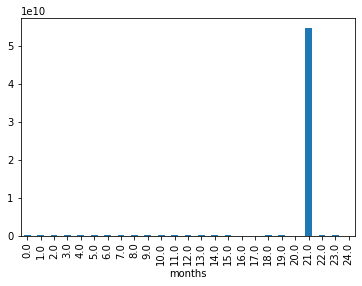

In [57]:
df = explore.feature_over_time('user_acc_mean', one_year_users, 'mean')
df.groupby('months').q_time.mean().plot(kind='bar')
plt.show()